In [1]:
from pathlib import Path
from astropy.table import Table
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import astropy.units as u
import numpy as np


In [2]:
datapath = Path.cwd().parent / "cloudy"

In [6]:
tab = Table.read(datapath / "ou5a-observables.csv")
df = tab.to_pandas()
df

,model,EOS,Z_amp,Z_lambda,HeII4686_Hb,HeI5016_Hb,OII4651_Hb,OIII5007_Hb,OIII4363_CO_Hb,OIII4363_RR_Hb,OIII4363_CX_Hb,OIII4363_Hb,OIII4363_over_OIII5007
0,ou5a-T115-L660-n-lha,const_n,0,homog,0.3703,0.03912,0.002777,16.3500,0.273900,0.000400,0.000221,0.27450,0.016790
1,ou5a-T115-L660-n-lha-Z06fluct-short,const_n,6,short,0.4126,0.03696,0.010420,11.7700,0.085090,0.001266,0.000557,0.08691,0.007382
2,ou5a-T115-L660-n-lha-Z06fluct-long,const_n,6,long,0.4095,0.03736,0.007469,13.6500,0.103000,0.001637,0.000660,0.10530,0.007719
3,ou5a-T115-L660-n-lha-Z15fluct-short,const_n,15,short,0.4737,0.03449,0.027300,3.2290,0.027980,0.003009,0.000769,0.03175,0.009835
4,ou5a-T115-L660-n-lha-Z15fluct-long,const_n,15,long,0.4886,0.03415,0.019920,5.4390,0.037640,0.003976,0.000828,0.04245,0.007804
5,ou5a-T115-L660-n-lha-Z30fluct-short,const_n,30,short,0.4569,0.03492,0.057630,1.1060,0.011770,0.004859,0.000695,0.01733,0.015670
6,ou5a-T115-L660-n-lha-Z30fluct-long,const_n,30,long,0.4644,0.03344,0.045700,2.1970,0.016830,0.006253,0.000725,0.02381,0.010830
7,ou5a-T115-L660-n-lha-Z60fluct-short,const_n,60,short,0.4020,0.03626,0.114000,0.4625,0.006623,0.007158,0.000618,0.01440,0.031140
8,ou5a-T115-L660-n-lha-Z60fluct-long,const_n,60,long,0.3960,0.03452,0.093170,0.9472,0.008830,0.009135,0.000642,0.01861,0.019640


<Axes: >

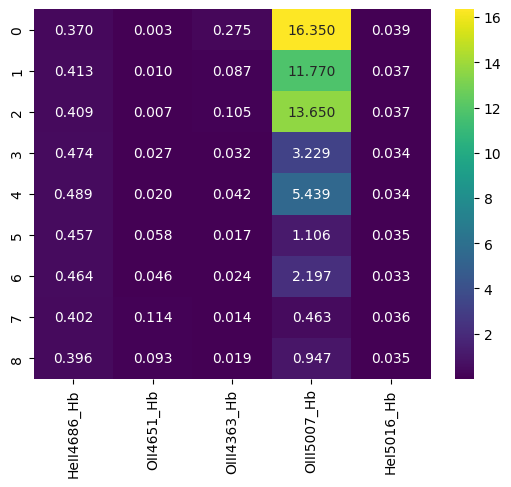

In [8]:
ratios = ["HeII4686_Hb", "OII4651_Hb", "OIII4363_Hb", "OIII5007_Hb", "HeI5016_Hb"]
sns.heatmap(df[ratios], cmap="viridis", annot=True, fmt=".3f")

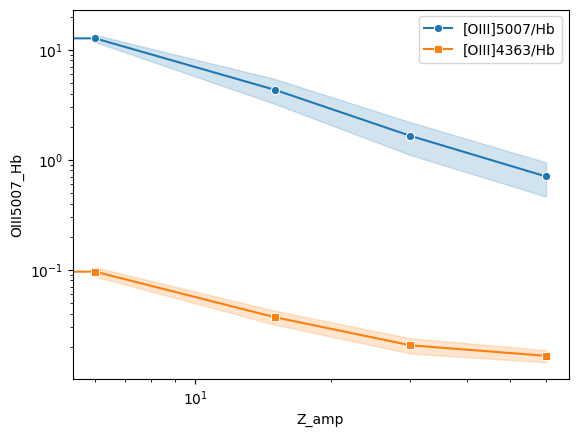

In [13]:
fig, ax = plt.subplots()
sns.lineplot(data=df, x="Z_amp", y="OIII5007_Hb", marker="o", label="[OIII]5007/Hb")
sns.lineplot(data=df, x="Z_amp", y="OIII4363_Hb", marker="s", label="[OIII]4363/Hb")
ax.set_xscale("log")
ax.set_yscale("log")

plt.legend()

In [42]:
df = df.assign(OIII4363c_over_OIII5007=df.OIII4363_CO_Hb / df.OIII5007_Hb)
df[["OIII4363_over_OIII5007", "OIII4363c_over_OIII5007"]]

,OIII4363_over_OIII5007,OIII4363c_over_OIII5007
0,0.016790,0.016752
1,0.007382,0.007229
2,0.007719,0.007546
3,0.009835,0.008665
4,0.007804,0.006920
5,0.015670,0.010642
6,0.010830,0.007660
7,0.031140,0.014320
8,0.019640,0.009322


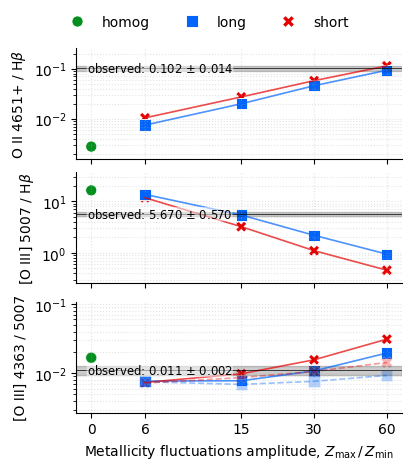

In [73]:

ratios = [
    # "HeII4686_Hb",
    # "HeI5016_Hb",
    "OII4651_Hb",
    "OIII5007_Hb",
    # "OIII4363_Hb",
    "OIII4363_over_OIII5007",
]

# Estimate of spatial variation in line ratios (%). Added as source of error
e_spatial = 10
# From Corradi+(2015). Tuples of (Value, % error)
observed_ratios = {
    "OII4651_Hb": (10.2/100, np.hypot(9, e_spatial)), # Summed components of V1 multiplet
    "OIII5007_Hb": (567/100, np.hypot(1, e_spatial)),
    "OIII4363_over_OIII5007": (6.33/567, np.hypot(10, e_spatial)),
}

labels = {
    "OII4651_Hb": r"O II 4651+ / H$\beta$", 
    "OIII5007_Hb": r"[O III] 5007 / H$\beta$",
    "OIII4363_over_OIII5007": r"[O III] 4363 / 5007",
}

# consistent palette/markers for Z_lambda
# hue_order = ["homog", "short", "long"]
# palette   = dict(zip(hue_order, sns.color_palette(n_colors=len(hue_order))))

palette = {
    "homog": "xkcd:emerald green",
    "long": "xkcd:bright blue",
    "short": "xkcd:red",
}
hue_order = list(palette)
style_kws = dict(
    markers={"homog": "o", "short": "X", "long": "s"}, 
)

# make compact vertical stack
height_per = 1.4  # inches per panel (shrink here to compress further)
fig, axes = plt.subplots(len(ratios), 1, figsize=(4, height_per*len(ratios)),
                         sharex=True, constrained_layout=True)

# draw once to capture legend artists from the first axis
for i, (ax, col) in enumerate(zip(axes, ratios)):
    # points
    sns.scatterplot(
        data=df, x="Z_amp", y=col, hue="Z_lambda", style="Z_lambda",
        hue_order=hue_order, palette=palette, s=65, ax=ax, **style_kws
    )
    # lines per Z_lambda
    for zlam, g in df.sort_values("Z_amp").groupby("Z_lambda"):
        ax.plot(g["Z_amp"], g[col], alpha=0.7, color=palette.get(zlam), lw=1.2)

    # Add in collisional-only ratio for 4363/5007
    if col == "OIII4363_over_OIII5007":
        colc = col.replace("4363", "4363c")
        sns.scatterplot(
            data=df, x="Z_amp", y=colc, hue="Z_lambda", style="Z_lambda",
            hue_order=hue_order, palette=palette, s=65, ax=ax, alpha=0.3, **style_kws
        )
        for zlam, g in df.sort_values("Z_amp").groupby("Z_lambda"):
            ax.plot(g["Z_amp"], g[colc], alpha=0.4, ls="dashed", color=palette.get(zlam), lw=1.2)
      
    # Add horizonal bands for observed values
    observed, e_observed = observed_ratios[col]
    eps = observed * e_observed / 100
    olabel = fr"observed: {observed:.3f} $\pm$ {eps:.3f}"
    ax.axhspan(
        observed - eps, observed + eps,
        alpha=0.2, color="k",
    )
    ax.axhline(observed, color="k", linestyle="solid", lw=0.5)
    ax.text(-0.5, observed, olabel, va="center", fontsize="small", bbox=dict(fc="w", lw=0, alpha=0.5, boxstyle="Round, pad=0.01"))
    
    ax.set_yscale("log")
    # symlog x: compress the linear segment around 0 to avoid the big gap
    ax.set_xscale("symlog", linthresh=6, linscale=0.2, subs=[1,2,3,4,5,6,7,8,9])

    # enforce ≥ 1 dex on y-range with a bit of padding
    y = df[col].to_numpy(dtype=float)
    y = y[np.isfinite(y) & (y > 0)]
    if y.size:
        logmin, logmax = np.log10(y.min()), np.log10(y.max())
        if logmax - logmin < 1.0:
            c = 0.5*(logmin + logmax)
            logmin, logmax = c - 0.5, c + 0.5
        # small padding
        ax.set_ylim(10**(logmin-0.25), 10**(logmax+0.35))

    ax.set_ylabel(labels[col])
    ax.grid(True, which="both", ls=":", alpha=0.35)

    # remove per-panel legends; we’ll add a single figure legend below
    ax.legend_.remove()

# tidy x axis: show the discrete amplitudes you have
axes[-1].set_xlabel("Z_amp")
axes[-1].set_xticks([0, 6, 15, 30, 60])
axes[-1].set_xticklabels([str(s) for s in axes[-1].get_xticks()])

axes[-1].get_xaxis().set_minor_locator(plt.NullLocator())

axes[-1].set_xlabel(r"Metallicity fluctuations amplitude, $Z_\mathrm{max} \,/\, Z_\mathrm{min}$")

# single legend (from the first axes)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, ncol=3, frameon=False, loc="upper center", bbox_to_anchor=(0.5, 1.1))
sns.despine()
fig.savefig("ou5-cloudy-line-ratios-vs-observed.pdf", bbox_inches="tight")